# BOOKING HOTEL CANCELLATION: UNDERSTANDING AND PREVENTION 
## BY Andri Erlianto Sandi

## bussiness metrics

Our hotel which is located in portugal have a problem about the amount of booking cancellations that happened quuiet a lot in recent time. this will make the hotel lose a lot of potential revenue which will endanger the economical health of the company. our data comes from various variables such as country, booking changes before, 

** target **
0=  will cancelling the booking
1= will not cancelling the booking


## GOAL 

finding a method to determine whether the customer that booking will cancell it or not


## analytic method

using the variables from the dataset i will try to find the features included for the classification model in machine learning. 

## stakeholder
the stakeholder is the one who will benefit from this machine learning and also helps us apply to machine learning to make better booking. this means those people are owner of the hotel, marketing of the hotel, manager and othe division such as room manager. the machine learning will using feature not only from the book but also other factors such as customers room and etc. the machine learninng will be automatic detection of customer who likely to stay or cancell.

In [79]:

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [80]:
import pandas as pd

# Load the dataset
file_path = 'data_hotel_booking_demand.csv'
hotel_data = pd.read_csv(file_path)

# Show the first few rows of the dataset
hotel_data


,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


There are 83573 rows dan 11 columns 


In [81]:
hotel_data.describe

<bound method NDFrame.describe of       country market_segment  previous_cancellations  booking_changes  \
0         IRL  Offline TA/TO                       0                0   
1         FRA      Online TA                       0                0   
2         PRT      Online TA                       0                1   
3         NLD      Online TA                       0                0   
4         PRT      Online TA                       0                2   
...       ...            ...                     ...              ...   
83568     PRT      Online TA                       0                0   
83569     FRA      Online TA                       0                0   
83570     PRT      Online TA                       0                1   
83571      CN  Offline TA/TO                       0                0   
83572     PRT         Groups                       0                0   

      deposit_type  days_in_waiting_list    customer_type reserved_room_type  \
0       N

__insight__

1. Categorical: country, market_segment, deposit_type, customer_type, reserved_room_type.
2. Numerical: previous_cancellations, booking_changes, days_in_waiting_list, required_car_parking_spaces, total_of_special_requests, is_canceled (binary).

# DATA PREPARATION

before processing analyzing data for machine learning, we should analyze any error that could affect the outcome of our modeling later. the first this is check for missing values. 

In [82]:
# Check for missing values
missing_values = hotel_data.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_values


country    351
dtype: int64

there are 351 rows with missing values

## visualisasi missing values


<Axes: >

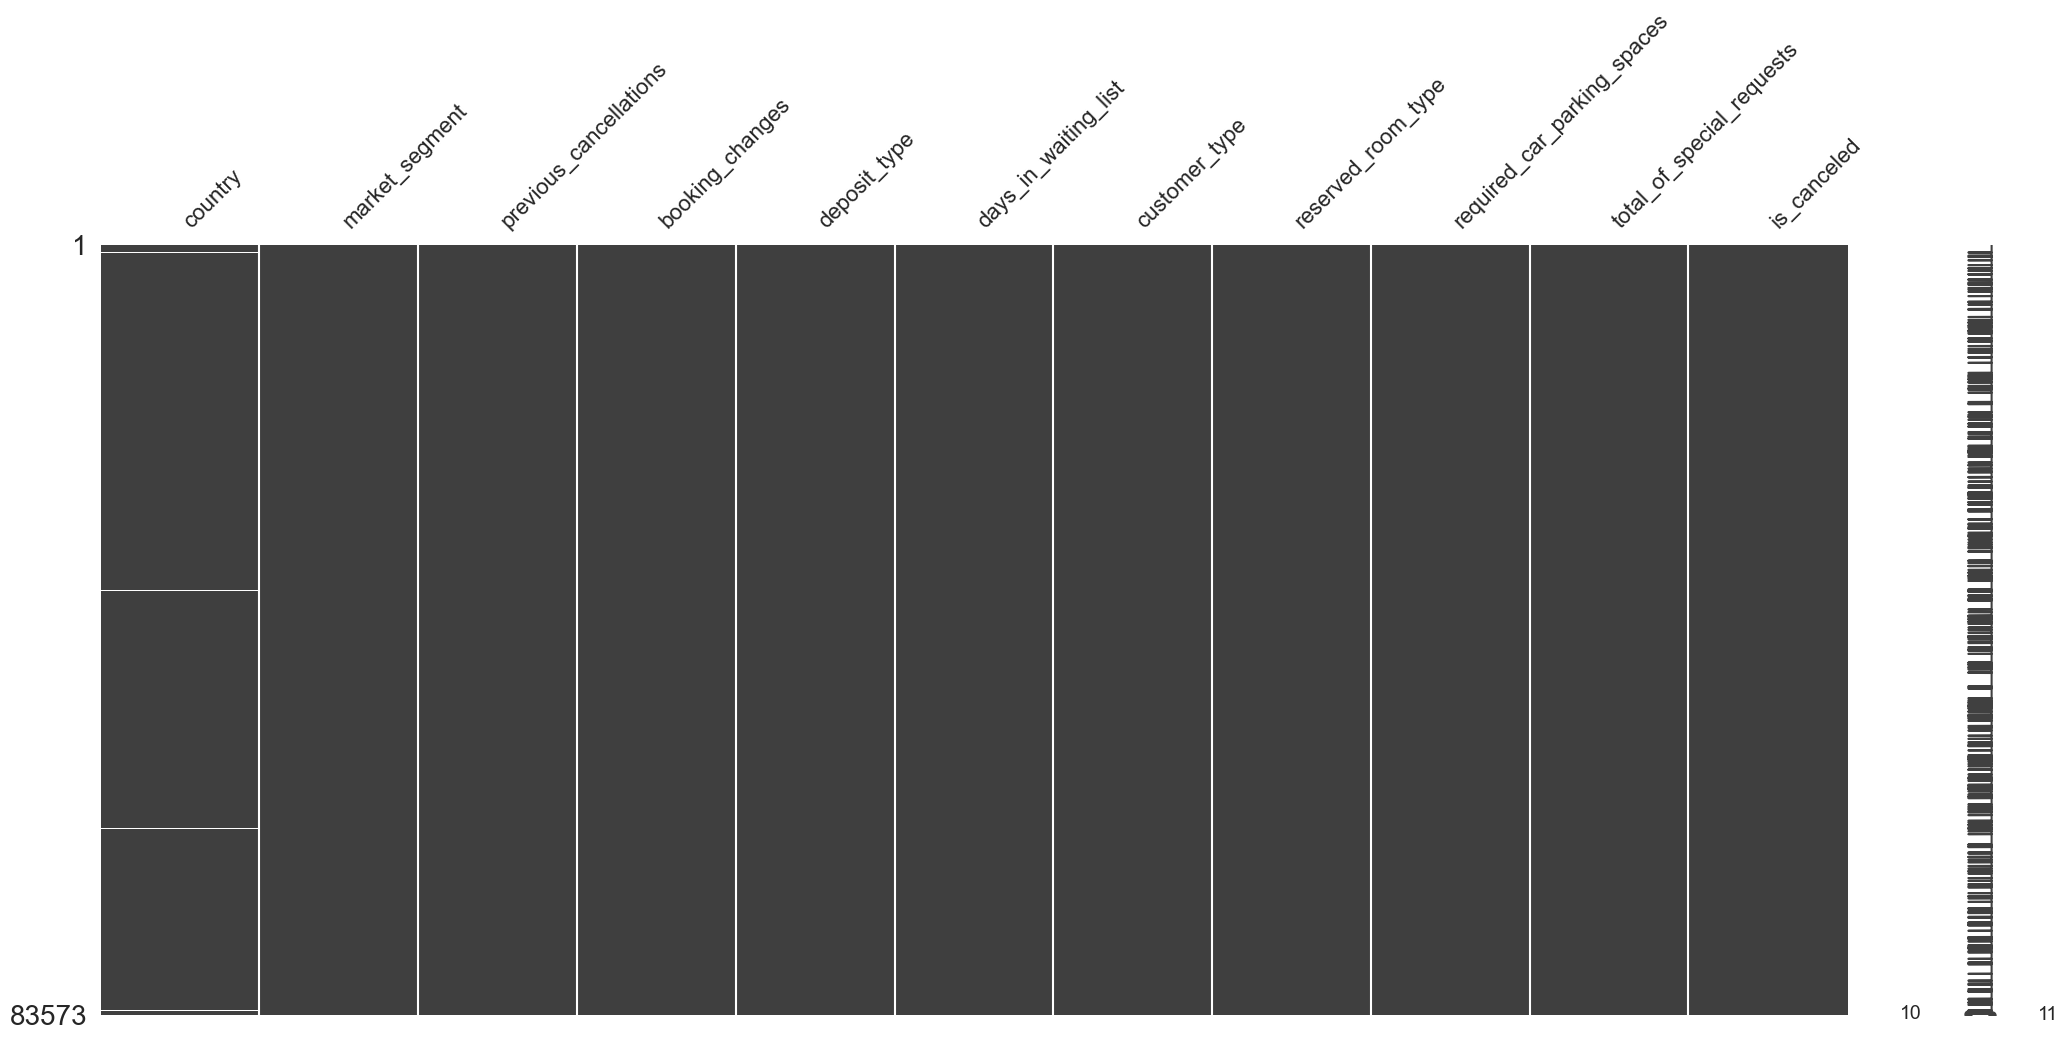

In [83]:
import missingno as msno

msno.matrix(hotel_data)


__insight__

the places are quite scattered but only on the  country's coloumn. the amount  of missing value is pretty small which is 351 data from 83 thousand 


In [84]:
# Impute missing values in "country" with the mode
hotel_data['country'].fillna(hotel_data['country'].mode()[0], inplace=True)

# Check again for missing values
missing_values_after_imputation = hotel_data.isnull().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]

# Check data types
data_types = hotel_data.dtypes

missing_values_after_imputation, data_types


(Series([], dtype: int64),
 country                        object
 market_segment                 object
 previous_cancellations          int64
 booking_changes                 int64
 deposit_type                   object
 days_in_waiting_list            int64
 customer_type                  object
 reserved_room_type             object
 required_car_parking_spaces     int64
 total_of_special_requests       int64
 is_canceled                     int64
 dtype: object)

In [85]:
# Data Cleaning Process

# Check for missing values
missing_values = hotel_data.isnull().sum()

# Check for duplicate rows
duplicate_rows = hotel_data.duplicated().sum()

# Check for any anomalous entries in the categorical data
# We look for any categories which may have very few entries and might be due to data entry errors
categorical_columns = hotel_data.select_dtypes(include=['object']).columns
anomalous_entries = {column: hotel_data[column].value_counts().tail() for column in categorical_columns}

# Print out the findings
(missing_values, duplicate_rows, anomalous_entries)


(country                        0
 market_segment                 0
 previous_cancellations         0
 booking_changes                0
 deposit_type                   0
 days_in_waiting_list           0
 customer_type                  0
 reserved_room_type             0
 required_car_parking_spaces    0
 total_of_special_requests      0
 is_canceled                    0
 dtype: int64,
 73476,
 {'country': country
  ZMB    1
  LCA    1
  SYC    1
  GLP    1
  AIA    1
  Name: count, dtype: int64,
  'market_segment': market_segment
  Direct           8898
  Corporate        3792
  Complementary     511
  Aviation          165
  Undefined           1
  Name: count, dtype: int64,
  'deposit_type': deposit_type
  No Deposit    73352
  Non Refund    10111
  Refundable      110
  Name: count, dtype: int64,
  'customer_type': customer_type
  Transient          62732
  Transient-Party    17536
  Contract            2882
  Group                423
  Name: count, dtype: int64,
  'reserved_room_t

In [86]:
# Remove duplicate rows
data_cleaned = hotel_data.drop_duplicates()

# Confirm the duplicates have been removed
remaining_duplicates = hotel_data.duplicated().sum()

# Display the shape of the cleaned data
cleaned_data_shape = hotel_data.shape

(remaining_duplicates, cleaned_data_shape)


(73476, (83573, 11))

The amount of duplicate is 73.476 from 83573 data.

In [87]:
# Remove duplicate rows
data_cleaned = hotel_data.drop_duplicates()

# Confirm the duplicates have been removed
remaining_duplicates = data_cleaned.duplicated().sum()

# Display the shape of the cleaned data
cleaned_data_shape = data_cleaned.shape

(remaining_duplicates, cleaned_data_shape)


(0, (10097, 11))

The duplicates are removed and the amount of data is 10097.

# handling outliers

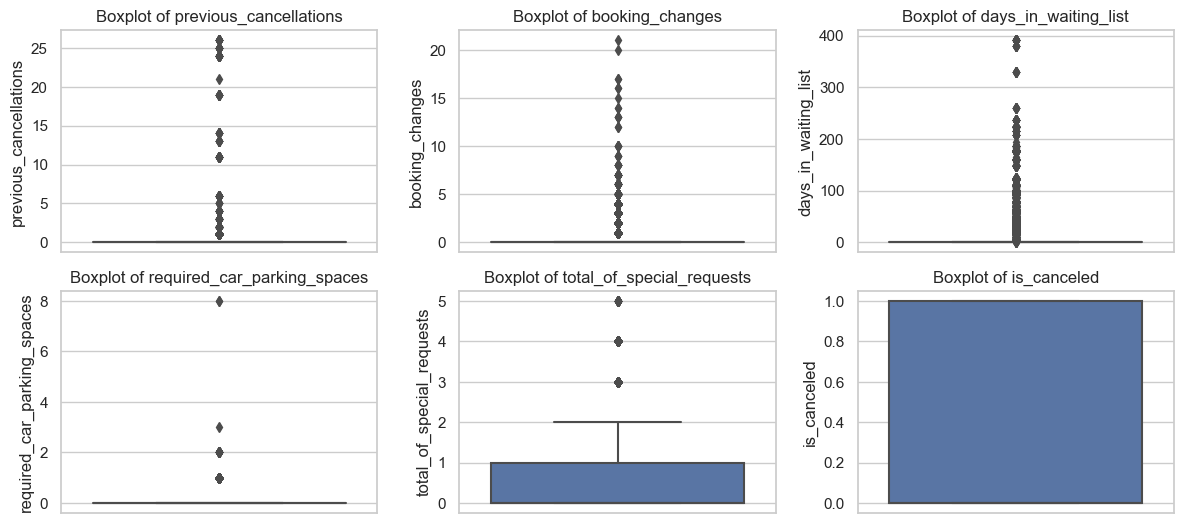

In [88]:
# Visualize outliers using boxplots for numerical columns
numerical_columns = hotel_data.select_dtypes(include='int64').columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=hotel_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


__insight__ 

1. previous_cancellations: Some canclelations are way above the amount of other cancellations
2. booking_changes: most data concentrated on smaller value, but some of them have very high value
3. days_in_waiting_list: most dont uses waiting line but some of them have very long waiting times.
4. required_car_parking_spaces: most dont need parking spaces but several of them need one or more. 
5. total_of_special_requests: Sebagian besar pemesanan memiliki jumlah permintaan khusus yang rendah, tetapi ada beberapa yang memiliki jumlah yang tinggi.

In [89]:
# Define a function to calculate the outliers using the interquartile range
def calculate_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    return outliers.mean()

# Calculate the average of the outliers for the specified columns
average_outliers_previous_cancellations = calculate_outliers(data_cleaned['previous_cancellations'])
average_outliers_booking_changes = calculate_outliers(data_cleaned['booking_changes'])
average_outliers_days_in_waiting_list = calculate_outliers(data_cleaned['days_in_waiting_list'])

(average_outliers_previous_cancellations, average_outliers_booking_changes, average_outliers_days_in_waiting_list)


(2.357702349869452, 4.006075334143378, 78.11182795698925)

__insight__

For average outliers previous cancellations are  2 times
For average outliers booking changes are 4 times
For  avergae outliers days in waiting list are 78 days.

# Erasing some outliers

one of the reason why i want to erase the outlier is that some of outliers that high seems to be some error data input. so i decide to remove them

In [90]:
# Identify and potentially remove outliers that are above the average of the outliers
def remove_high_outliers(df, column, average_outlier):
    return df[df[column] <= average_outlier]

# Apply the removal for the specified columns
data_without_errors_previous_cancellations = remove_high_outliers(data_cleaned, 'previous_cancellations', average_outliers_previous_cancellations)
data_without_errors_booking_changes = remove_high_outliers(data_cleaned, 'booking_changes', average_outliers_booking_changes)
data_without_errors_days_in_waiting_list = remove_high_outliers(data_cleaned, 'days_in_waiting_list', average_outliers_days_in_waiting_list)

# The cleaned data should exclude outliers for all three columns above the average outlier value
data_cleaned_without_errors = data_cleaned[
    (data_cleaned['previous_cancellations'] <= average_outliers_previous_cancellations) &
    (data_cleaned['booking_changes'] <= average_outliers_booking_changes) &
    (data_cleaned['days_in_waiting_list'] <= average_outliers_days_in_waiting_list)
]

# Confirm changes by checking the new shape of the data
data_cleaned_without_errors_shape = data_cleaned_without_errors.shape
data_cleaned_without_errors_shape


(9699, 11)

__insight__

the remaining data is 9699 data

# unique value
Now we will count unique value.

In [91]:
# Check unique values for categorical columns
categorical_columns = hotel_data.select_dtypes(include='object').columns
unique_values = {col: hotel_data[col].unique() for col in categorical_columns}
unique_values


{'country': array(['IRL', 'FRA', 'PRT', 'NLD', 'ESP', 'UMI', 'CN', 'LUX', 'BRA',
        'BEL', 'JPN', 'DEU', 'ITA', 'CHE', 'GBR', 'AGO', 'SRB', 'COL',
        'CHN', 'SWE', 'AUT', 'CIV', 'CZE', 'POL', 'USA', 'SGP', 'RUS',
        'ROU', 'DNK', 'IND', 'MAR', 'PHL', 'ARG', 'ISL', 'ZAF', 'LBN',
        'MOZ', 'TUR', 'BGD', 'MEX', 'CAF', 'NOR', 'FIN', 'UKR', 'EGY',
        'ISR', 'KOR', 'AZE', 'HUN', 'AUS', 'EST', 'CHL', 'SVN', 'PRY',
        'ABW', 'ALB', 'LTU', 'ARE', 'HRV', 'SAU', 'NZL', 'LVA', 'ATA',
        'KAZ', 'DZA', 'TWN', 'CRI', 'BIH', 'BGR', 'IRQ', 'OMN', 'VEN',
        'IDN', 'GEO', 'MLT', 'IRN', 'BLR', 'URY', 'LBY', 'TUN', 'BEN',
        'MYS', 'MWI', 'GRC', 'CYP', 'CPV', 'HKG', 'PRI', 'MKD', 'MUS',
        'IMN', 'PAN', 'NGA', 'GLP', 'KHM', 'PER', 'QAT', 'SEN', 'MAC',
        'SVK', 'BHR', 'ECU', 'SYC', 'BOL', 'TJK', 'LCA', 'MDV', 'SYR',
        'ZMB', 'LIE', 'THA', 'MNE', 'BRB', 'CMR', 'JEY', 'GTM', 'LKA',
        'JOR', 'TZA', 'AND', 'ARM', 'GIB', 'VNM', 'PAK', 'JAM', 'DO

In [92]:
# Convert categorical columns to category type
hotel_data[categorical_columns] = hotel_data[categorical_columns].astype('category')

# Check the data types again to confirm the conversion
data_types_after_conversion = hotel_data.dtypes

# Check the distribution of the target variable 'is_canceled'
target_distribution = hotel_data['is_canceled'].value_counts(normalize=True)

data_types_after_conversion, target_distribution


(country                        category
 market_segment                 category
 previous_cancellations            int64
 booking_changes                   int64
 deposit_type                   category
 days_in_waiting_list              int64
 customer_type                  category
 reserved_room_type             category
 required_car_parking_spaces       int64
 total_of_special_requests         int64
 is_canceled                       int64
 dtype: object,
 is_canceled
 0    0.631723
 1    0.368277
 Name: proportion, dtype: float64)

__insight__
change the categiory colum to category type

# Unique Values
Unique values yang sudah dibersihkan

In [93]:
# Check unique values for categorical columns again to identify any typos or inconsistencies
unique_values_after_cleaning = {col: data_cleaned_without_errors[col].unique() for col in categorical_columns}
unique_values_after_cleaning


{'country': array(['IRL', 'FRA', 'PRT', 'NLD', 'ESP', 'UMI', 'CN', 'LUX', 'BRA',
        'BEL', 'JPN', 'DEU', 'ITA', 'CHE', 'GBR', 'AGO', 'SRB', 'COL',
        'CHN', 'SWE', 'AUT', 'CIV', 'CZE', 'POL', 'USA', 'SGP', 'RUS',
        'ROU', 'DNK', 'IND', 'MAR', 'PHL', 'ARG', 'ISL', 'ZAF', 'LBN',
        'MOZ', 'TUR', 'BGD', 'MEX', 'CAF', 'NOR', 'FIN', 'UKR', 'EGY',
        'ISR', 'KOR', 'AZE', 'HUN', 'AUS', 'EST', 'CHL', 'SVN', 'PRY',
        'ABW', 'ALB', 'LTU', 'ARE', 'HRV', 'SAU', 'NZL', 'LVA', 'ATA',
        'KAZ', 'DZA', 'TWN', 'CRI', 'BIH', 'BGR', 'IRQ', 'OMN', 'VEN',
        'IDN', 'GEO', 'MLT', 'IRN', 'BLR', 'URY', 'LBY', 'TUN', 'BEN',
        'MYS', 'MWI', 'GRC', 'CYP', 'CPV', 'HKG', 'PRI', 'MKD', 'MUS',
        'IMN', 'PAN', 'NGA', 'GLP', 'KHM', 'PER', 'QAT', 'SEN', 'MAC',
        'SVK', 'BHR', 'ECU', 'SYC', 'BOL', 'TJK', 'LCA', 'MDV', 'SYR',
        'ZMB', 'LIE', 'THA', 'MNE', 'BRB', 'CMR', 'JEY', 'GTM', 'LKA',
        'JOR', 'TZA', 'AND', 'ARM', 'GIB', 'VNM', 'PAK', 'JAM', 'DO

## Dropped Country's Columns
to  prevent discrimination it is required to drop column named "country". the main reason for this is just 

In [94]:
import pandas as pd



# Remove the 'country' column
data_dropped = data_cleaned_without_errors.drop('country', axis=1)

# Display the first few rows of the updated dataset
data_dropped.head()


,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


# EDA 


## Correlation Matrix of Numerical Values

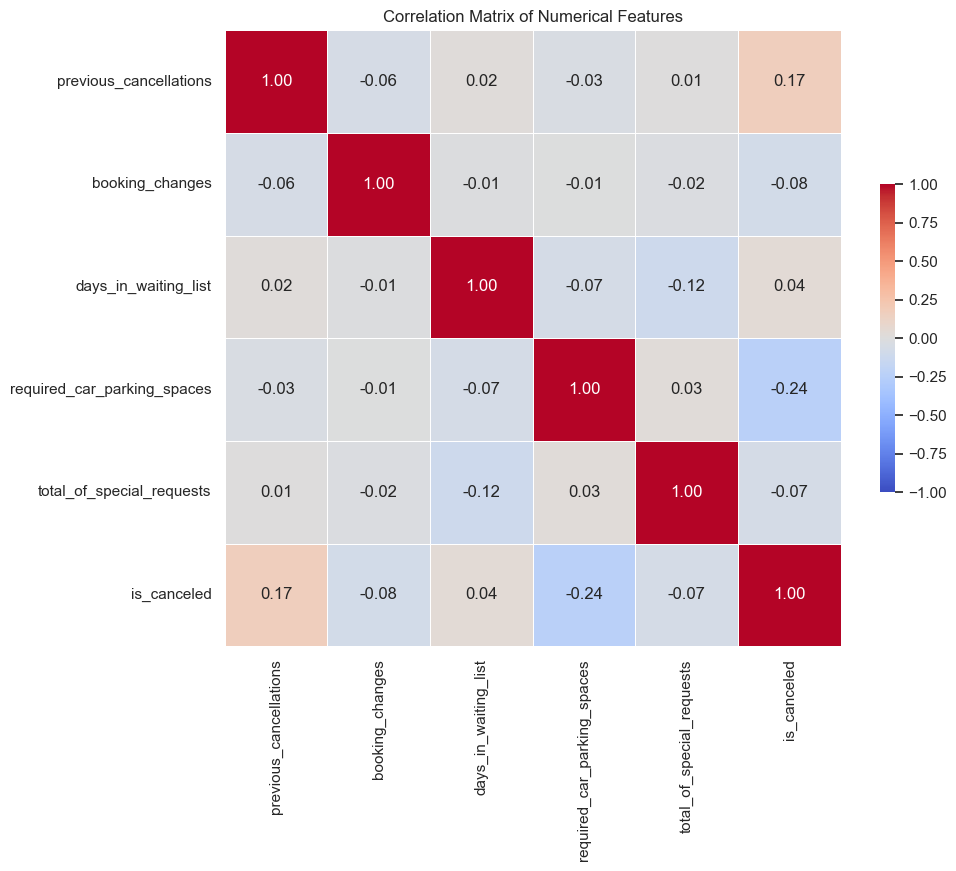

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical columns
correlation_matrix = data_cleaned_without_errors.select_dtypes(include='int64').corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Numerical Features')
plt.show()



__insight__

1. is cancelled with previous cancellations: have highest positif correlations on
2. required car parking spaces and is cancellations: have highest negative correlations.

## Vizualisation for ditribution of  numerical columns

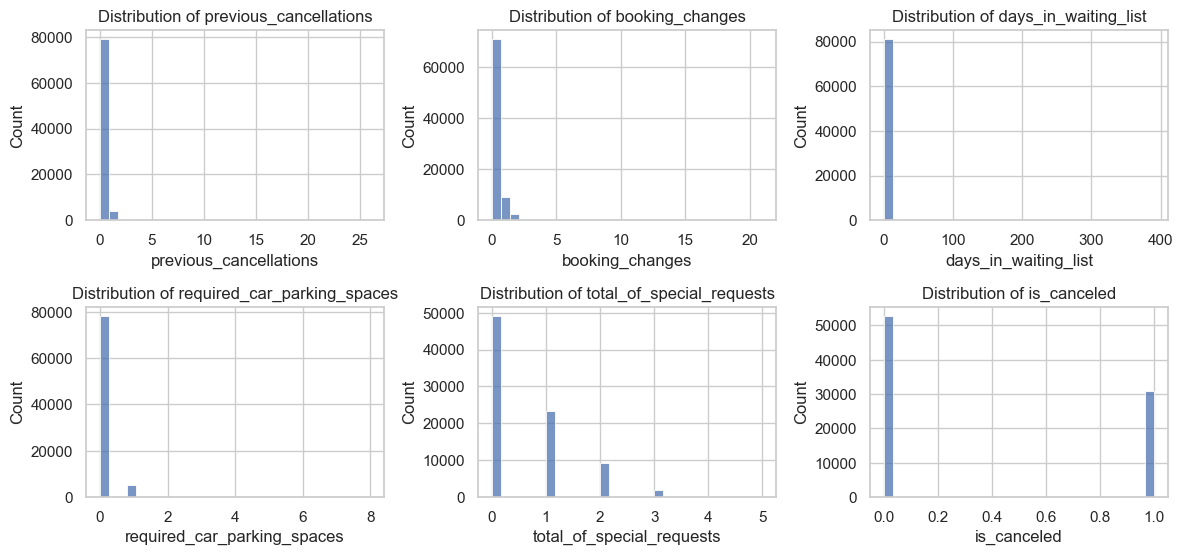

In [96]:
# Visualize the distribution of numerical columns
numerical_columns = data_cleaned_without_errors.select_dtypes(include='int64').columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(hotel_data[col], kde=False, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


__insight__

Previous Cancellations: Most bookings have zero previous cancellations, indicating a skewed distribution.

Booking Changes: A large number of bookings have no changes, with a few outliers having multiple changes.

Days in Waiting List: This is heavily skewed towards zero, suggesting that most bookings are not placed on the waiting list.

Required Car Parking Spaces: Most bookings do not require car parking spaces.

Total of Special Requests: A significant number of bookings have no special requests, but there are also many with one or two requests.

Is Canceled: This binary variable shows the proportion of bookings that were canceled versus those that were not.

In [97]:
# Checking the unique values and their counts for "customer_type", "reserved_room_type", and "deposit_type"
customer_type_counts = data_cleaned_without_errors['customer_type'].value_counts()
reserved_room_type_counts = data_cleaned_without_errors['reserved_room_type'].value_counts()
deposit_type_counts = data_cleaned_without_errors['deposit_type'].value_counts()

customer_type_counts, reserved_room_type_counts, deposit_type_counts


(customer_type
 Transient          6628
 Transient-Party    2350
 Contract            480
 Group               241
 Name: count, dtype: int64,
 reserved_room_type
 A    4265
 D    1982
 E    1224
 F     703
 G     540
 B     453
 C     334
 H     192
 P       4
 L       2
 Name: count, dtype: int64,
 deposit_type
 No Deposit    9491
 Non Refund     163
 Refundable      45
 Name: count, dtype: int64)

__insight__ 

These are distribution type of"customer_type", "reserved_room_type", dan "deposit_type":

1.   (customer_type):
Transient: 62,732 order (customer come without reservation)
Transient-Party: 17,536 pemesanan (group of customer come without reservation)
Contract: 2,882 pemesanan (customer with long contract)
Group: 423 pemesanan (grup with reservation )

2. (reserved_room_type):
A: 60,041 order
D: 13,526 order
E: 4,649 order
F: 2,037 order
G: 1,447 order
B: 787 order
C: 673 order
H: 401 order
P: 9 order
L: 3 order

3. (deposit_type):
No Deposit: 73,352 order (no deposit)
Non Refund: 10,111 order (deposit non-refundable)
Refundable: 110 order (deposit refundable)



In [98]:
# Checking the unique values and their counts for "market_segment" and "previous_cancellations"
market_segment_counts = hotel_data['market_segment'].value_counts()
previous_cancellations_counts = hotel_data['previous_cancellations'].value_counts()

market_segment_counts, previous_cancellations_counts


(market_segment
 Online TA        39460
 Offline TA/TO    17025
 Groups           13721
 Direct            8898
 Corporate         3792
 Complementary      511
 Aviation           165
 Undefined            1
 Name: count, dtype: int64,
 previous_cancellations
 0     79060
 1      4207
 2        86
 3        46
 24       33
 11       28
 6        19
 4        19
 26       18
 25       17
 19       12
 13       10
 14       10
 5         7
 21        1
 Name: count, dtype: int64)

__insight__ 
1.  (market_segment):
Online TA: 39,460 order (Travel Agent Online)
Offline TA/TO: 17,025 order (Travel Agent Offline)
Groups: 13,721 order 
Direct: 8,898 order 
Corporate: 3,792 order 
Complementary: 511 order 
Aviation: 165 order 
Undefined: 1 order 

2.  (previous_cancellations):
0: 79,060 order (tidak ada previous cancellations)
1: 4,207 order (1 previous cancellations)
2: 86 order (2 previous cancellations)
3: 46 order (3 previous cancellations)
... (nilai lainnya dengan jumlah pemesanan yang lebih rendah)
Distribusi ini memberikan kita pemahaman tentang bagaimana pemesanan dibagi berdasarkan segmen pasar dan jumlah pembatalan sebelumnya. Sebagian besar pemesanan tidak memiliki pembatalan sebelumnya, dan sebagian besar pemesanan berasal dari segmen pasar "Online TA" dan "Offline TA/TO".



## Distribution of cancelled orders

In [99]:
# Filter the dataset for cancelled bookings
cancelled_bookings = hotel_data[hotel_data['is_canceled'] == 1]

# Analyze distribution based on different characteristics


# 2. Market Segment
market_segment_distribution = cancelled_bookings['market_segment'].value_counts(normalize=True) * 100

# 3. Deposit Type
deposit_type_distribution = cancelled_bookings['deposit_type'].value_counts(normalize=True) * 100

# 4. Days in Waiting List
days_in_waiting_list_distribution = cancelled_bookings['days_in_waiting_list'].value_counts(normalize=True) * 100

# 5. Customer Type
customer_type_distribution = cancelled_bookings['customer_type'].value_counts(normalize=True) * 100

# 6. Reserved Room Type
reserved_room_type_distribution = cancelled_bookings['reserved_room_type'].value_counts(normalize=True) * 100

# Show the distributions
market_segment_distribution, deposit_type_distribution, days_in_waiting_list_distribution.head(10), customer_type_distribution, reserved_room_type_distribution


(market_segment
 Online TA        46.893885
 Groups           27.331211
 Offline TA/TO    18.815388
 Direct            4.376503
 Corporate         2.228865
 Complementary     0.237182
 Aviation          0.113718
 Undefined         0.003249
 Name: proportion, dtype: float64,
 deposit_type
 No Deposit    67.278576
 Non Refund    32.646696
 Refundable     0.074729
 Name: proportion, dtype: float64,
 days_in_waiting_list
 0     94.603288
 39     0.539346
 31     0.298915
 44     0.237182
 46     0.211190
 35     0.207941
 69     0.159205
 41     0.146208
 45     0.146208
 62     0.133212
 Name: proportion, dtype: float64,
 customer_type
 Transient          82.416011
 Transient-Party    14.575346
 Contract            2.875431
 Group               0.133212
 Name: proportion, dtype: float64,
 reserved_room_type
 A    76.002339
 D    13.870297
 E     4.389499
 F     1.968939
 G     1.686269
 B     0.828514
 C     0.692053
 H     0.529599
 P     0.029242
 L     0.003249
 Name: proportion, dtype

## Visualization of distribution of cancelled orders

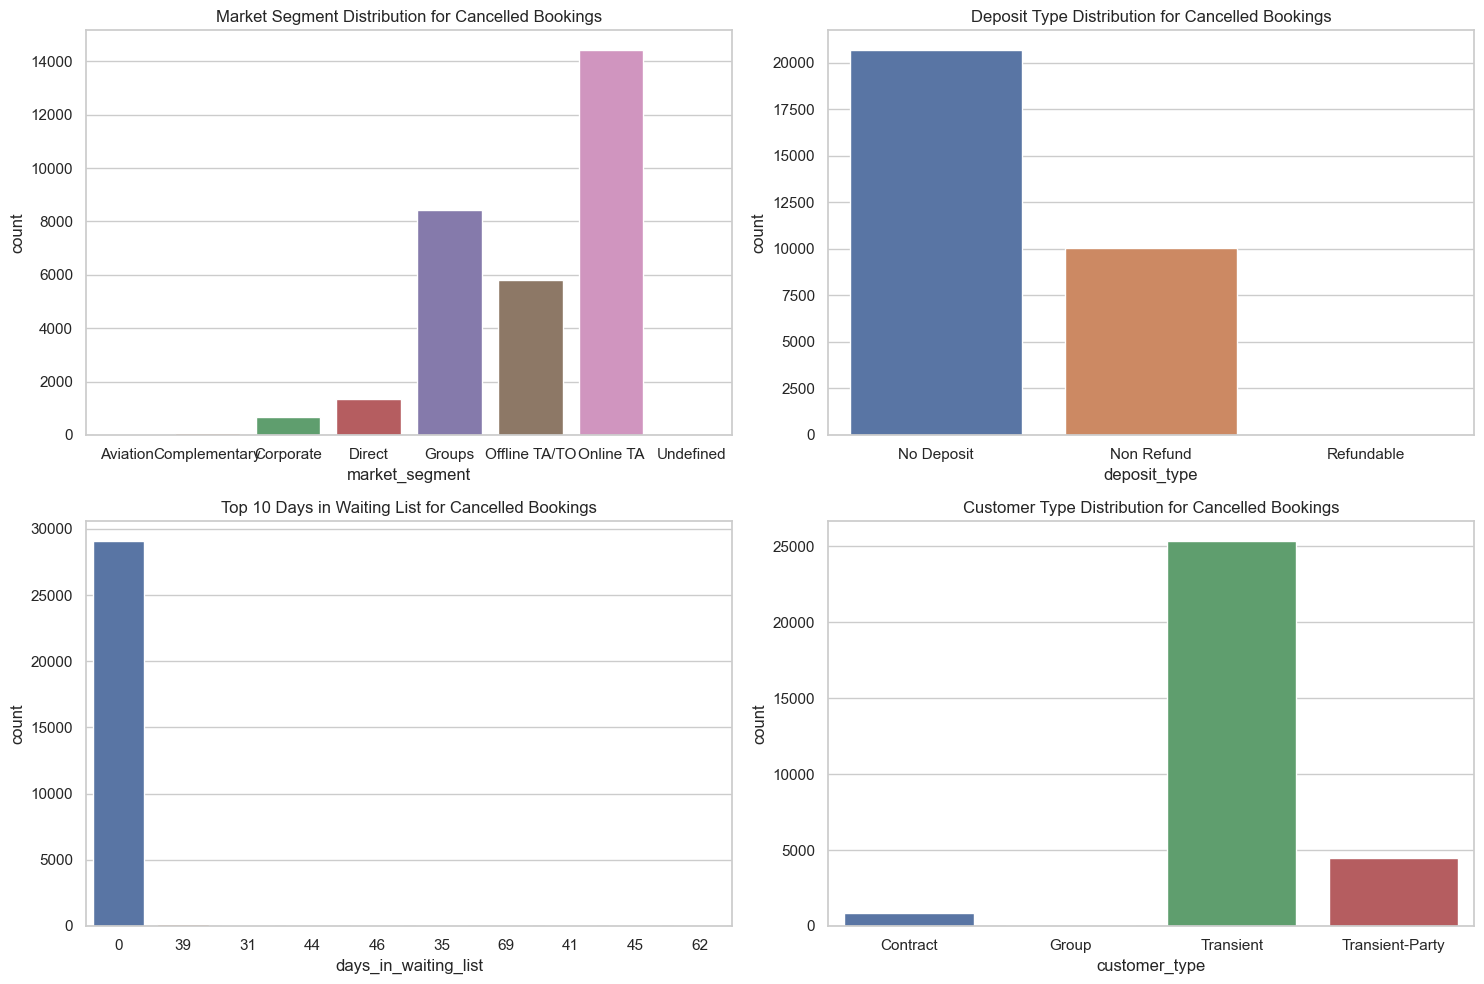

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

# 1. Market Segment Distribution
sns.countplot(x='market_segment', data=cancelled_bookings, ax=axes[0, 0])
axes[0, 0].set_title('Market Segment Distribution for Cancelled Bookings')

# 2. Deposit Type Distribution
sns.countplot(x='deposit_type', data=cancelled_bookings, ax=axes[0, 1])
axes[0, 1].set_title('Deposit Type Distribution for Cancelled Bookings')

# 3. Days in Waiting List Distribution
sns.countplot(x='days_in_waiting_list', data=cancelled_bookings, order=cancelled_bookings['days_in_waiting_list'].value_counts().index[:10], ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Days in Waiting List for Cancelled Bookings')

# 4. Customer Type Distribution
sns.countplot(x='customer_type', data=cancelled_bookings, ax=axes[1, 1])
axes[1, 1].set_title('Customer Type Distribution for Cancelled Bookings')

# Adjust layout
plt.tight_layout()
plt.show()


__insight__

1. Booking: Online TA and groups are the ones that cancelled the most

2. deposit type: no deposit type and refund are the first and second

3. days in waiting list: most of them have waiting list

4. customer type: transient is the highest and transient party.

5. reserved type: A is the one used the most while D is second. 

## Distribution for non cancelled bookings

In [101]:
# Filter the dataset for non-cancelled bookings
non_cancelled_bookings = hotel_data[hotel_data['is_canceled'] == 0]

# Analyze distribution based on different characteristics for non-cancelled bookings

# 1. Country
country_distribution_non_cancelled = non_cancelled_bookings['country'].value_counts(normalize=True) * 100

# 2. Market Segment
market_segment_distribution_non_cancelled = non_cancelled_bookings['market_segment'].value_counts(normalize=True) * 100

# 3. Deposit Type
deposit_type_distribution_non_cancelled = non_cancelled_bookings['deposit_type'].value_counts(normalize=True) * 100

# 4. Days in Waiting List
days_in_waiting_list_distribution_non_cancelled = non_cancelled_bookings['days_in_waiting_list'].value_counts(normalize=True) * 100

# 5. Customer Type
customer_type_distribution_non_cancelled = non_cancelled_bookings['customer_type'].value_counts(normalize=True) * 100

# 6. Reserved Room Type
reserved_room_type_distribution_non_cancelled = non_cancelled_bookings['reserved_room_type'].value_counts(normalize=True) * 100

# Show the distributions
country_distribution_non_cancelled.head(10), market_segment_distribution_non_cancelled, deposit_type_distribution_non_cancelled, days_in_waiting_list_distribution_non_cancelled.head(10), customer_type_distribution_non_cancelled, reserved_room_type_distribution_non_cancelled


(country
 PRT    28.875841
 GBR    12.825078
 FRA    11.252960
 ESP     8.428828
 DEU     8.091675
 IRL     3.341225
 ITA     3.263567
 BEL     2.504025
 NLD     2.250213
 USA     2.115731
 Name: proportion, dtype: float64,
 market_segment
 Online TA        47.404110
 Offline TA/TO    21.278530
 Direct           14.302491
 Groups           10.055877
 Corporate         5.883133
 Complementary     0.829624
 Aviation          0.246235
 Undefined         0.000000
 Name: proportion, dtype: float64,
 deposit_type
 No Deposit    99.715882
 Refundable     0.164788
 Non Refund     0.119329
 Name: proportion, dtype: float64,
 days_in_waiting_list
 0      98.249834
 58      0.196988
 87      0.113647
 122     0.085235
 63      0.068188
 38      0.060612
 223     0.051141
 77      0.051141
 65      0.043565
 176     0.043565
 Name: proportion, dtype: float64,
 customer_type
 Transient          70.775642
 Transient-Party    24.718250
 Contract            3.782555
 Group               0.723553
 Name

In [102]:
reserved_room_type_distribution_non_cancelled

reserved_room_type
A    69.417558
D    17.533857
E     6.246804
F     2.710484
G     1.757742
B     1.007671
C     0.871295
H     0.450800
L     0.003788
P     0.000000
Name: proportion, dtype: float64

In [103]:
reserved_room_type_distribution

reserved_room_type
A    76.002339
D    13.870297
E     4.389499
F     1.968939
G     1.686269
B     0.828514
C     0.692053
H     0.529599
P     0.029242
L     0.003249
Name: proportion, dtype: float64

## Visualization for Non-cancelled bookings

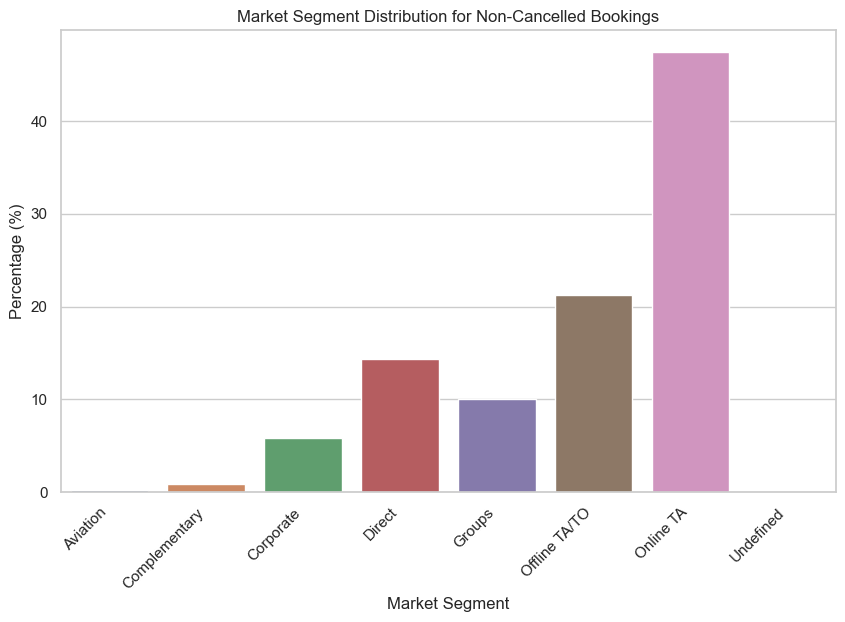

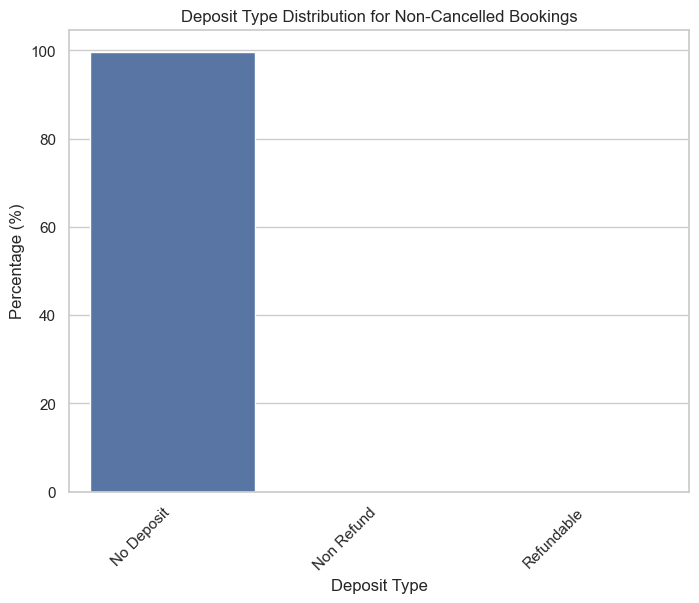

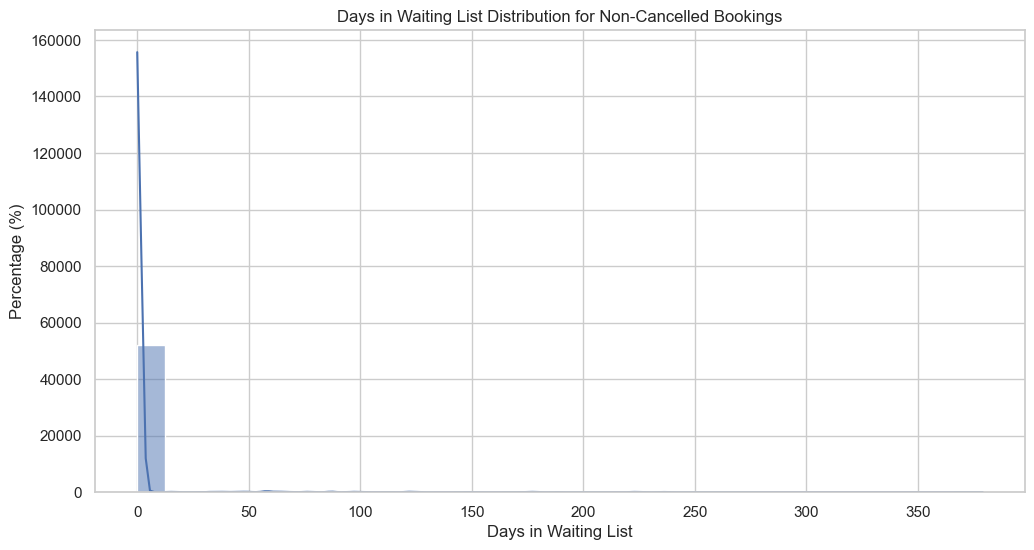

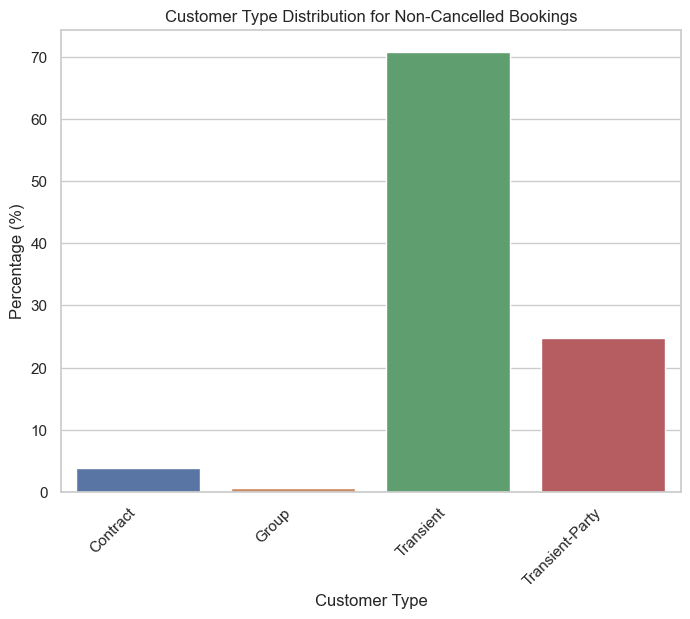

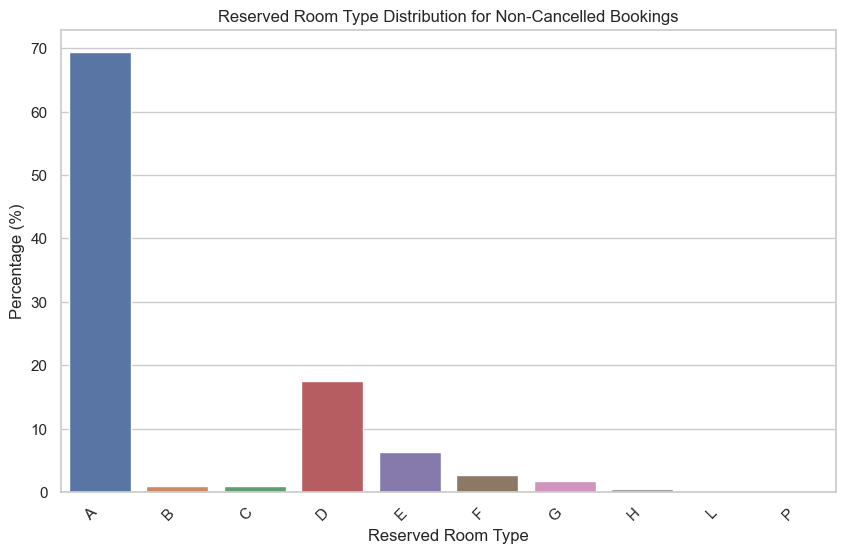

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")



# Plot 2: Market Segment Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=market_segment_distribution_non_cancelled.index, y=market_segment_distribution_non_cancelled.values)
plt.title('Market Segment Distribution for Non-Cancelled Bookings')
plt.xlabel('Market Segment')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot 3: Deposit Type Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=deposit_type_distribution_non_cancelled.index, y=deposit_type_distribution_non_cancelled.values)
plt.title('Deposit Type Distribution for Non-Cancelled Bookings')
plt.xlabel('Deposit Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot 4: Days in Waiting List Distribution (histogram)
plt.figure(figsize=(12, 6))
sns.histplot(non_cancelled_bookings['days_in_waiting_list'], bins=30, kde=True)
plt.title('Days in Waiting List Distribution for Non-Cancelled Bookings')
plt.xlabel('Days in Waiting List')
plt.ylabel('Percentage (%)')
plt.show()

# Plot 5: Customer Type Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_type_distribution_non_cancelled.index, y=customer_type_distribution_non_cancelled.values)
plt.title('Customer Type Distribution for Non-Cancelled Bookings')
plt.xlabel('Customer Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot 6: Reserved Room Type Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=reserved_room_type_distribution_non_cancelled.index, y=reserved_room_type_distribution_non_cancelled.values)
plt.title('Reserved Room Type Distribution for Non-Cancelled Bookings')
plt.xlabel('Reserved Room Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()


__insight__

1. market segment: online TA has highest percentage while offline TA is second
2. deposit type: no deposit is the only one that non_cancelled users use
3. days in waiting list: most of them do not have waiting days or just few days alot
4. customer type: transiennt is highest followed by transient party.
5. room type: A is the highest D is second. 

## comparison of distribution of cancelled and not cancelled based on required_car_parking_space and total_special_requests

In [105]:
# Analyze distribution based on "required_car_parking_spaces" and "total_of_special_requests" for cancelled bookings
car_parking_distribution_cancelled = cancelled_bookings['required_car_parking_spaces'].value_counts(normalize=True) * 100
special_request_distribution_cancelled = cancelled_bookings['total_of_special_requests'].value_counts(normalize=True) * 100

# Analyze distribution based on "required_car_parking_spaces" and "total_of_special_requests" for non-cancelled bookings
car_parking_distribution_non_cancelled = non_cancelled_bookings['required_car_parking_spaces'].value_counts(normalize=True) * 100
special_request_distribution_non_cancelled = non_cancelled_bookings['total_of_special_requests'].value_counts(normalize=True) * 100

# Show the distributions
car_parking_distribution_cancelled, special_request_distribution_cancelled, car_parking_distribution_non_cancelled, special_request_distribution_non_cancelled


(required_car_parking_spaces
 0    100.0
 Name: proportion, dtype: float64,
 total_of_special_requests
 0    75.927611
 1    16.589772
 2     6.390929
 3     0.997466
 4     0.090974
 5     0.003249
 Name: proportion, dtype: float64,
 required_car_parking_spaces
 0    90.099441
 1     9.853206
 2     0.041671
 8     0.003788
 3     0.001894
 Name: proportion, dtype: float64,
 total_of_special_requests
 0    48.904252
 1    34.298703
 2    13.548631
 3     2.797613
 4     0.393977
 5     0.056824
 Name: proportion, dtype: float64)

__insight__
the lesser the special request the higher probabilty the customer is cancelled
more space for parking car the higher probabilty is not cancelled
less special request the higher posibility that it will not be cancelled

## visualization of room cancellation based on type

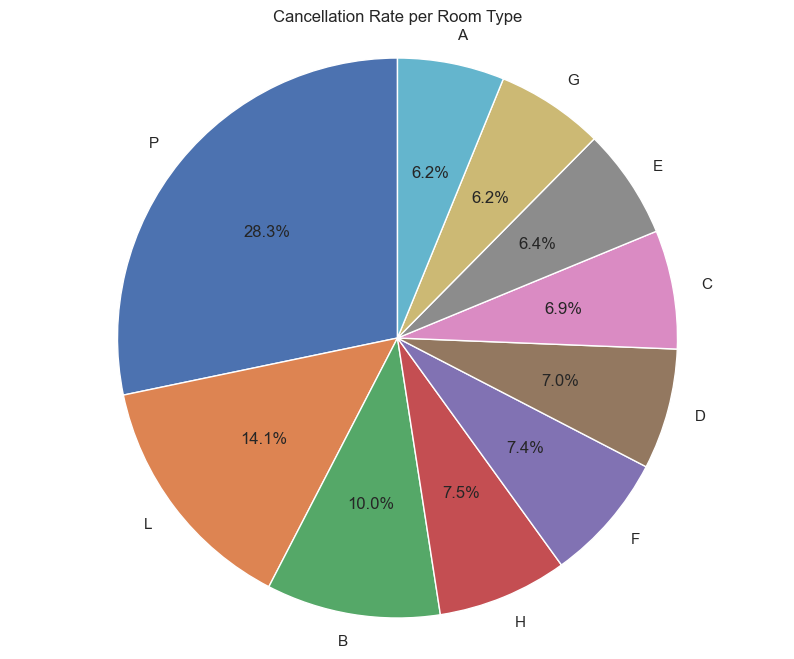

is_canceled,cancellation_rate,not_canceled_rate
reserved_room_type,,
P,100.000000,0.000000
L,50.000000,50.000000
B,35.540839,64.459161
H,26.562500,73.437500
F,26.315789,73.684211
D,24.672048,75.327952
C,24.251497,75.748503
E,22.549020,77.450980
G,22.037037,77.962963


In [106]:
import matplotlib.pyplot as plt

# Calculate the percentage of cancellations and non-cancellations per room type
room_cancellation_counts = data_cleaned_without_errors.groupby('reserved_room_type')['is_canceled'].value_counts().unstack().fillna(0)
room_cancellation_counts['cancellation_rate'] = room_cancellation_counts[1] / (room_cancellation_counts[0] + room_cancellation_counts[1]) * 100
room_cancellation_counts['not_canceled_rate'] = room_cancellation_counts[0] / (room_cancellation_counts[0] + room_cancellation_counts[1]) * 100

# Generate a pie chart for cancellation rate per room type
room_cancellation_counts = room_cancellation_counts.sort_values('cancellation_rate', ascending=False)  # Sort for better visualization
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(room_cancellation_counts['cancellation_rate'], labels=room_cancellation_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Cancellation Rate per Room Type')
plt.show()

room_cancellation_counts[['cancellation_rate', 'not_canceled_rate']]


__insight__

P has highest cancellation rate while A has lowest cancellation rate

## type of customer who often cancelled

In [107]:



# Let's check the proportion of 'Undefined' in market_segment
undefined_market_segment = data_cleaned_without_errors[data_cleaned_without_errors['market_segment'] == 'Undefined'].shape[0]
total_entries = data_cleaned_without_errors.shape[0]
undefined_proportion = undefined_market_segment / total_entries

# If 'Undefined' is a very small proportion, we group it into 'Other'
if undefined_proportion < 0.01:  # threshold for significance can be set as 1%
    data_cleaned_without_errors['market_segment'] = data_cleaned_without_errors['market_segment'].replace('Undefined', 'Other')

# Now let's proceed to analyze the kind of customer that often cancels the booking
# We will aggregate the data based on the 'is_canceled' column to see which categories have higher cancellation rates

# For this, we will calculate the cancellation rate for each category in the 'customer_type' column
cancellation_rates = data_cleaned_without_errors.groupby('customer_type')['is_canceled'].mean().sort_values(ascending=False)

cancellation_rates,


(customer_type
 Transient          0.288473
 Contract           0.131250
 Transient-Party    0.128511
 Group              0.087137
 Name: is_canceled, dtype: float64,)

__insight__

transient has highest rate of cancellation while  group is lowest rate of cancellation.

## Rooms that has highest cancellation

In [108]:
# Count the number of cancellations for each room type
room_cancellation_counts['number_of_cancellations'] = room_cancellation_counts[1]
room_cancellation_counts['number_of_cancellations']


reserved_room_type
P      4.0
L      1.0
B    161.0
H     51.0
F    185.0
D    489.0
C     81.0
E    276.0
G    119.0
A    931.0
Name: number_of_cancellations, dtype: float64

__insight__

P has lowest counts of cancellation despite having 100 percent rate, while A has highest counts cancellation.

In [109]:
# Total number of cancellations regardless of room type
total_cancellations = data_cleaned_without_errors['is_canceled'].sum()
total_cancellations


2298

__insight__
total cancellation is 2307 rooms

## AVERAGE PRICE OF HOTEL

since we dont have  a data about the price of the hotels, we will took average hotel rooms price in portugal from [external data](https://www.budgetyourtrip.com/hotels/portugal-PT#:~:text=The%20average%20hotel%20price%20in,days%20in%20Portugal%20is%20%24296) which is 99 dollars. 

In [110]:
data_cleaned_without_errors.to_csv('D:/bootcamp/capstone 3/hotel_booking_cleaned_versi_akhir.csv', index=False)
